In [47]:
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

In [9]:
df = pd.read_parquet("../data/higgs.parquet")

In [48]:
df.head()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b-tag,jet2pt,jet2eta,jet2phi,jet2b-tag,jet3pt,jet3eta,jet3phi,jet3b-tag,jet4pt,jet4eta,jet4phi,jet4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,class
0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,-0.213642,1.271015,2.214872,0.499994,-1.261432,0.732156,0.000000,0.398701,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343,1
1,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,1.540659,-0.819690,2.214872,0.993490,0.356080,-0.208778,2.548224,1.256955,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118,1
2,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,-0.676016,0.736159,2.214872,1.298720,-1.430738,-0.364658,0.000000,0.745313,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904,0
3,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,1.020974,0.971407,2.214872,0.596761,-0.350273,0.631194,0.000000,0.479999,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487,1
4,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,0.755421,0.643110,1.426367,0.000000,0.921661,-1.190432,-1.615589,0.000000,0.651114,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98050 entries, 0 to 98049
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lepton_pT                 98050 non-null  float64
 1   lepton_eta                98050 non-null  float64
 2   lepton_phi                98050 non-null  float64
 3   missing_energy_magnitude  98050 non-null  float64
 4   missing_energy_phi        98050 non-null  float64
 5   jet1pt                    98050 non-null  float64
 6   jet1eta                   98050 non-null  float64
 7   jet1phi                   98050 non-null  float64
 8   jet1b-tag                 98050 non-null  float64
 9   jet2pt                    98050 non-null  float64
 10  jet2eta                   98050 non-null  float64
 11  jet2phi                   98050 non-null  float64
 12  jet2b-tag                 98050 non-null  float64
 13  jet3pt                    98050 non-null  float64
 14  jet3et

## Exploration

### Target

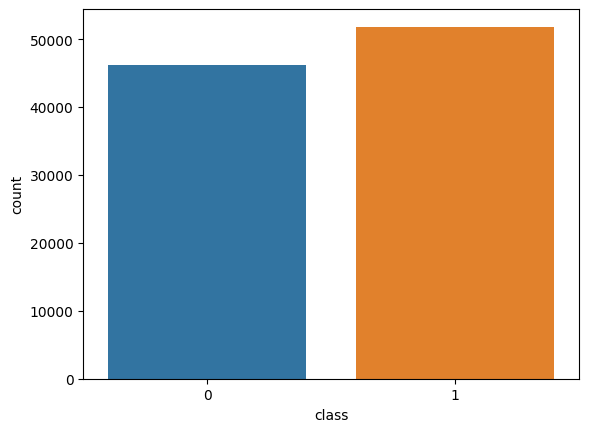

In [16]:
sns.countplot(x="class", data=df)
plt.show()

### Random features

In [73]:
tags = ["jet1b-tag", "jet2b-tag", "jet3b-tag", "jet4b-tag"]
phi = ["jet1phi", "jet2phi", "jet3phi", "jet4phi"]
eta = ["jet1eta", "jet2eta", "jet3eta", "jet4eta"]
pt = ["jet1pt", "jet2pt", "jet3pt", "jet4pt"]
lepton = ["lepton_pT", "lepton_eta", "lepton_phi"]
energy = ["missing_energy_magnitude", "missing_energy_phi"]
other = ["m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb","m_wwbb"]

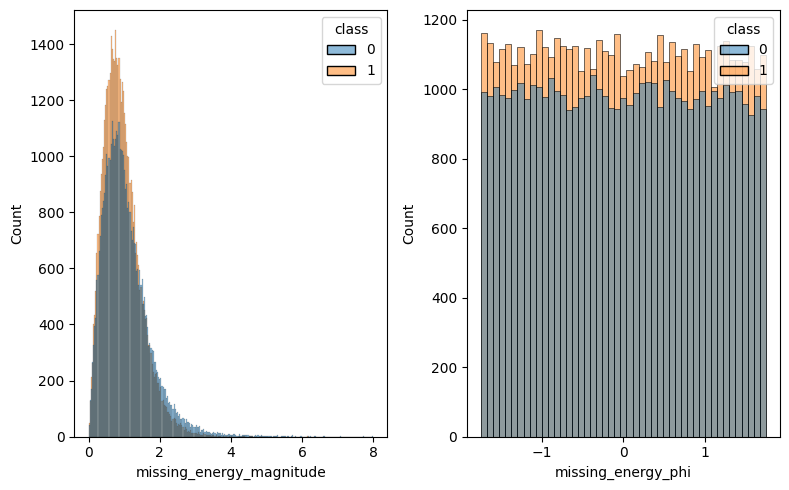

In [80]:
fig, axes = plt.subplots(1,2, figsize=(8,5))

axes = axes.flatten()

for i, col in enumerate(energy):
    sns.histplot(x=col, hue="class", data=df, ax=axes[i])

plt.tight_layout()
plt.show()

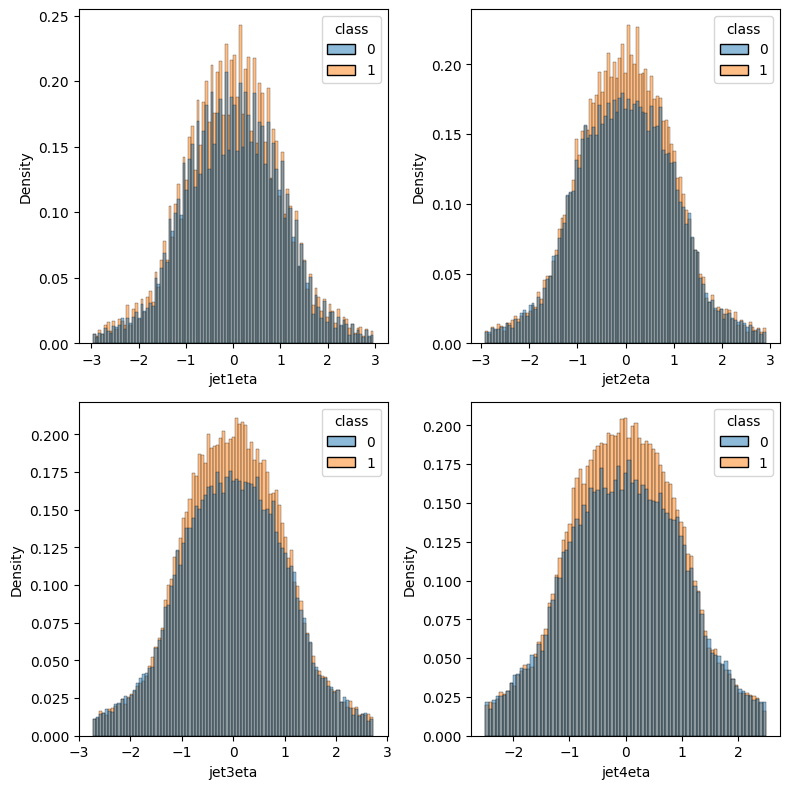

In [64]:
fig, axes = plt.subplots(2,2, figsize=(8,8))

axes = axes.flatten()

for i, col in enumerate(eta):
    sns.histplot(x=col, hue="class", stat="density", data=df, ax=axes[i])

plt.tight_layout()
plt.show()

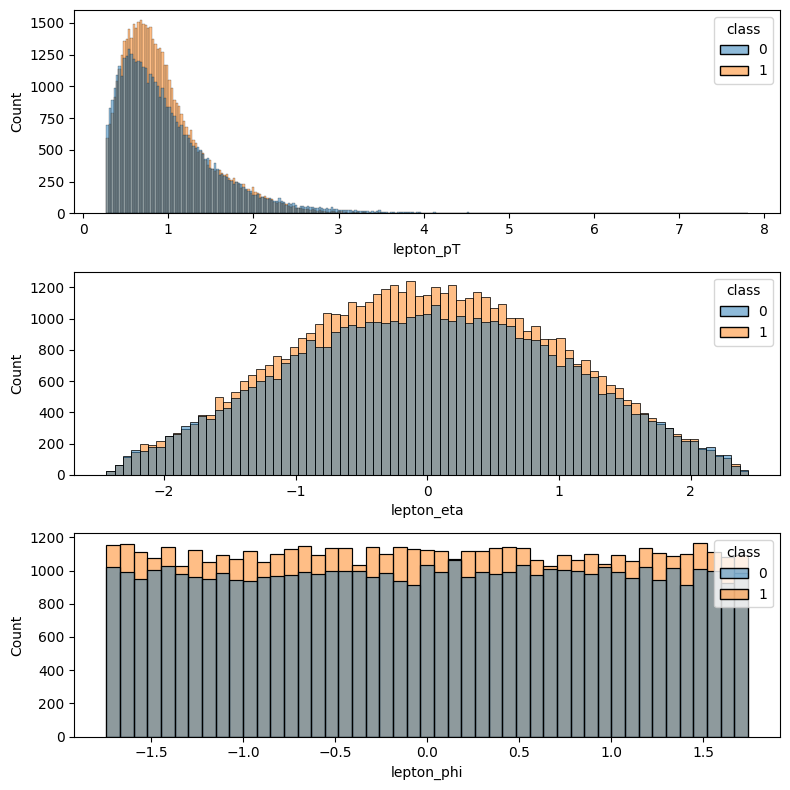

In [75]:
fig, axes = plt.subplots(3,1, figsize=(8,8))
axes = axes.flatten()

for i, col in enumerate(lepton):
    sns.histplot(x=col, hue="class", data=df, ax=axes[i])

plt.tight_layout()
plt.show()

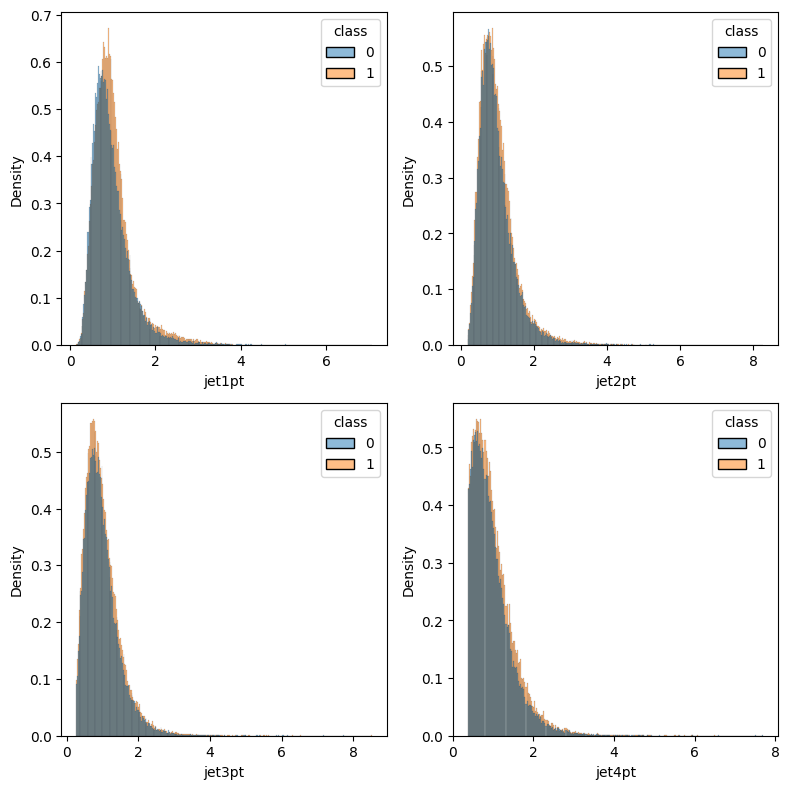

In [70]:
fig, axes = plt.subplots(2,2, figsize=(8,8))

axes = axes.flatten()

for i, col in enumerate(pt):
    sns.histplot(x=col, hue="class", stat="density", data=df, ax=axes[i])

plt.tight_layout()
plt.show()

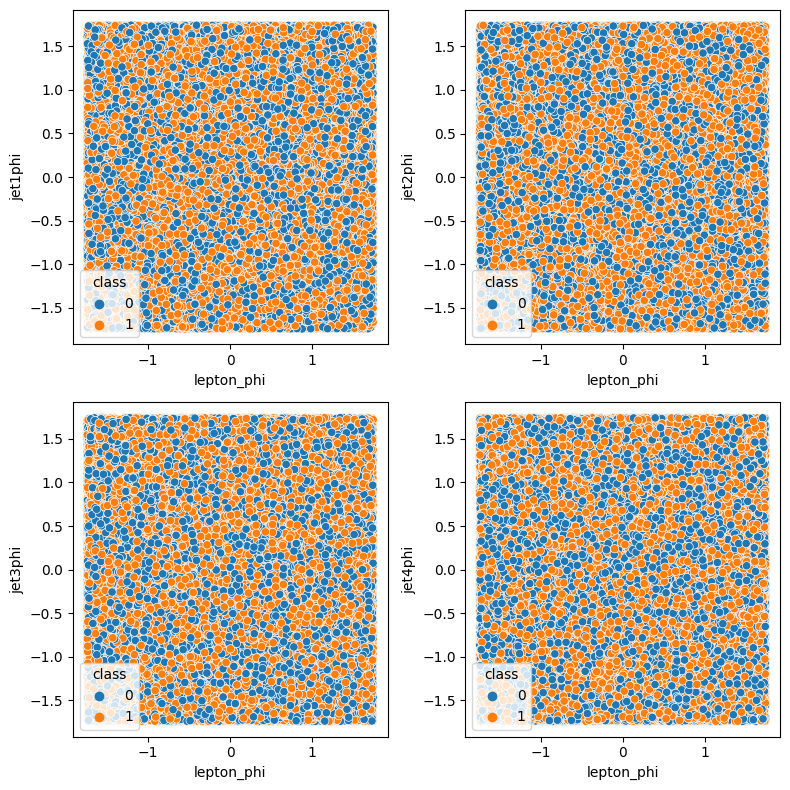

In [84]:
fig, axes = plt.subplots(2,2, figsize=(8,8))

axes = axes.flatten()

for i, col in enumerate(phi):
    sns.scatterplot(y=col, hue="class", x="lepton_phi", data=df, ax=axes[i])

plt.tight_layout()
plt.show()